<a href="https://colab.research.google.com/github/Kedree/DataAnalysisUMF/blob/main/ICA10/ICA10DONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



*   Please read titanic.csv from the DATA folder
*   Change 1s to "Survived" under the Survived column of the data frame by looking at the example provided.
*   Get rows which don't have "?" under Pclass column and move to the next step.


 

In [26]:
titanic = pd.read_csv('/content/drive/MyDrive/DATA/titanic.csv')

titanic = titanic.astype({"Survived": str})

for cellNum in range(len(titanic['Survived'])):
  if titanic.at[cellNum, 'Survived'] == "1":
      titanic.at[cellNum, 'Survived'] = 'Survived'

titanic.loc[titanic["Survived"] == "0", "Survived"] = "Died"

valid = titanic.loc[titanic['Pclass']!="?"]
invalid = titanic.loc[titanic['Pclass']=="?"]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,25,26,Survived,?,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
37,37,38,Died,?,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
61,61,62,Survived,?,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
80,80,81,Died,?,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
119,119,120,Died,?,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
146,146,147,Survived,?,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
180,180,181,Died,?,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
221,221,222,Died,?,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
272,272,273,Survived,?,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
284,284,285,Died,?,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S


Create a multipanel plot which draws density plots for each class-survived combination. Please also use the hue parameter based on the Sex attribute to have two density plots in each panel with different colors.

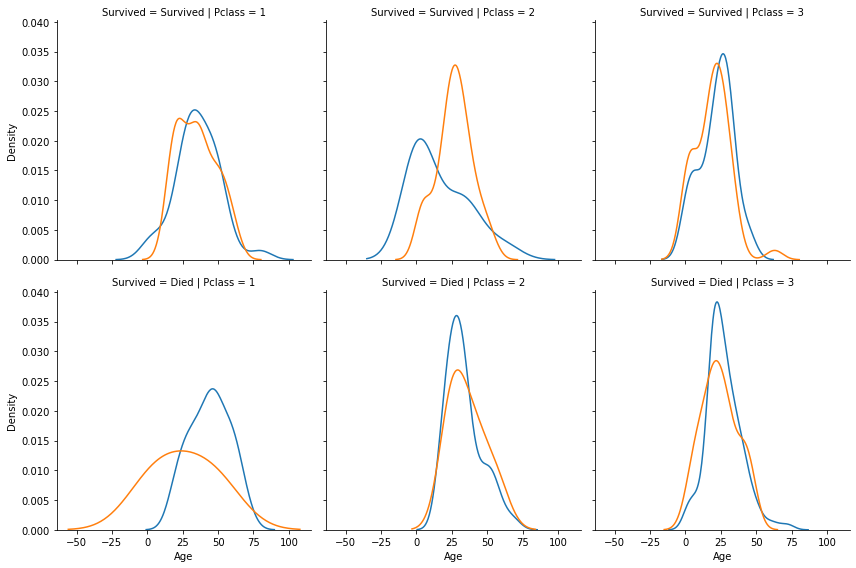

In [69]:
valid = valid.sort_values("Pclass")

grid = sns.FacetGrid(valid, col='Pclass', row='Survived', hue='Sex', height=4, sharex=True, sharey=True)
print(grid.map(sns.kdeplot, 'Age'))

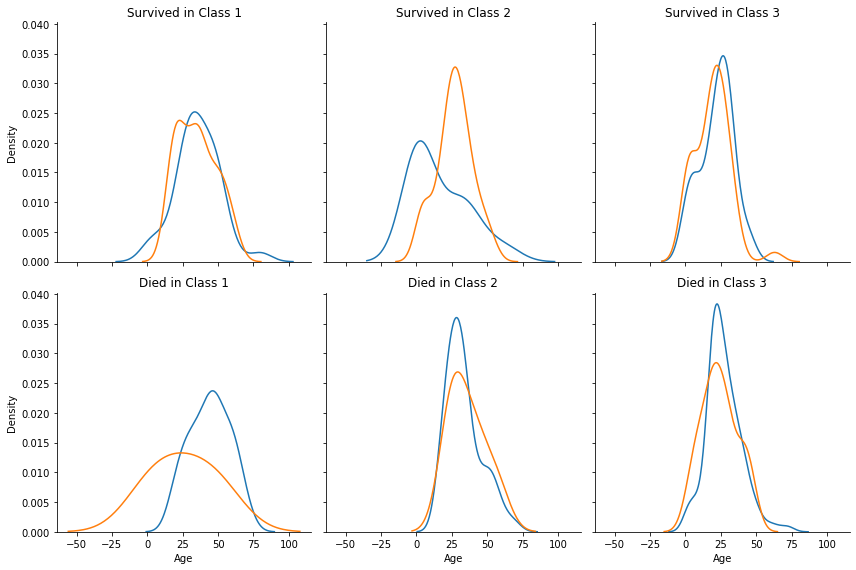

In [76]:
valid = valid.sort_values("Pclass")

grid = sns.FacetGrid(valid, col='Pclass', row='Survived', hue='Sex', height=4, sharex=True, sharey=True, legend_out=True) # Note sure why its not showing legend
print(grid.map(sns.kdeplot, 'Age'))

#you can uncomment below when you come up with your density plots for each class-survived combination
titles = ['Survived in Class 1','Survived in Class 2', 'Survived in Class 3', 'Died in Class 1','Died in Class 2', 'Died in Class 3']
for ax,title in zip(grid.axes.flatten(),titles):
    ax.set_title(title )